Week 9 Independant-Led: Descriptive Statistics <br>

Author: Parker Munsey <br>
Course: BGEN632 Grad. Intro. to Python <br> 
Term: Spring 2025 <br>
Date Due: April 28, 2025 <br> 

                            OLS Regression Results                            
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.10
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           8.52e-31
Time:                        21:50:20   Log-Likelihood:                -211.44
No. Observations:                 201   AIC:                             434.9
Df Residuals:                     195   BIC:                             454.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0146      0.352      2.886   

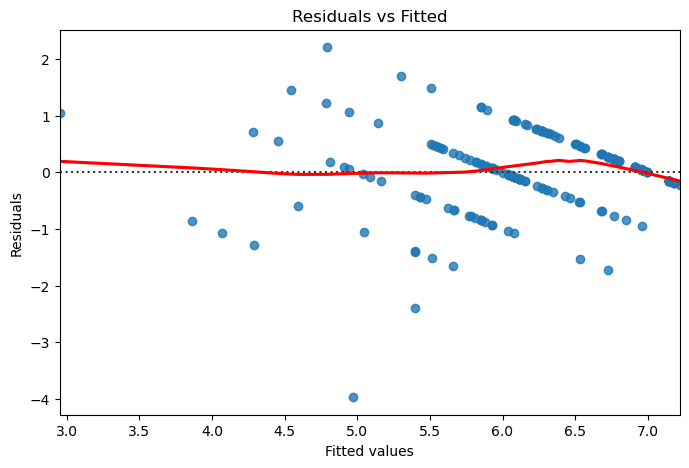

        feature        VIF
0         const  50.211191
1  attitude1_01   3.891143
2  attitude1_02   2.695679
3  attitude1_03   2.406965
4      peruse01   1.517833
5       satis01   1.556937
{'Lagrange multiplier statistic': 25.555186081967335, 'p-value': 0.00010882389212069822, 'f-value': 5.680716545217228, 'f p-value': 6.474906503921377e-05}


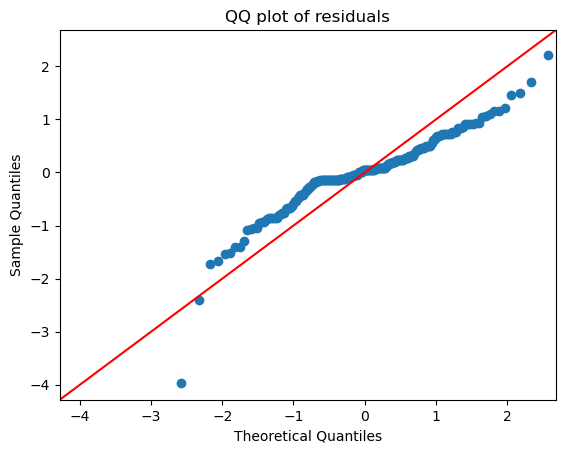

Shapiro-Wilk Test: W=0.9223, p-value=0.0000


In [2]:
# Independent Lab: Inferential Statistics
# ECT Data - Linear and Multiple Regression

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# 2. Load Dataset
ect_data = pd.read_csv(r"C:\\Users\\TechnellogicPC\\UTW\\Python\\week9labs\\ect_data.txt", delimiter="\t")

# Preview the dataset
ect_data.head()

# Define Target and Predictor Variables (corrected)
X = ect_data[['attitude1_01', 'attitude1_02', 'attitude1_03', 'peruse01', 'satis01']]
y = ect_data['intent1_01']

# Add constant
X = sm.add_constant(X)


# 4. Fit the Multiple Linear Regression Model
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())

# 5. Check Model Assumptions

# 5a. Linearity (Residuals vs Fitted Values)
fitted_vals = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8,5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# 5b. Collinearity (Variance Inflation Factor - VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# 5c. Homoscedasticity (Breusch-Pagan Test)
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, X)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

# 5d. Independence (Durbin-Watson already in model summary)
# Look at Durbin-Watson value printed in model.summary()

# 5e. Normality (QQ Plot + Shapiro-Wilk Test)
sm.qqplot(residuals, line='45')
plt.title('QQ plot of residuals')
plt.show()

shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: W={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}')

References: <br>

Building and fitting OLS regression model (sm.OLS()), Calculating VIF, QQ plot
https://www.statsmodels.org/stable/index.html <br>

Creating Residuals vs Fitted plots (sns.residplot) <br>
https://seaborn.pydata.org/ <br>

Shapiro-Wilk normality test (scipy.stats.shapiro) <br>
https://docs.scipy.org/doc/scipy/ <br>